# NumPy and Matplotlib

This lecture introduces NumPy and Matplotlib, two of the most fundamental parts of the scientific python "ecosystem".
Most everything else is built on top of them.

<img src="https://github.com/numpy/numpy/blob/main/branding/logo/primary/numpylogo.png?raw=true" width="200px" />

**Numpy**: _The fundamental package for scientific computing with Python_

- Website: <https://numpy.org/>
- GitHub: <https://github.com/numpy/numpy>

<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="300px" />

**Matplotlib**: _a library for data visualization_

- Website: <https://matplotlib.org/>
- GitHub: <https://github.com/matplotlib/matplotlib>
 


# Numpy features

* Mathematical functions
  - trigonometry
  - statistics
  - random numbers
  - linear algebra
* Multidimensional arrays
* Masked arrays (for missing data)

There's too much to teach it all. See Numpy documentation

https://numpy.org/doc/stable/reference/

In [ ]:
import numpy as np

## NDArrays

The core NumPy class is the ndarray (n-dimensional array).

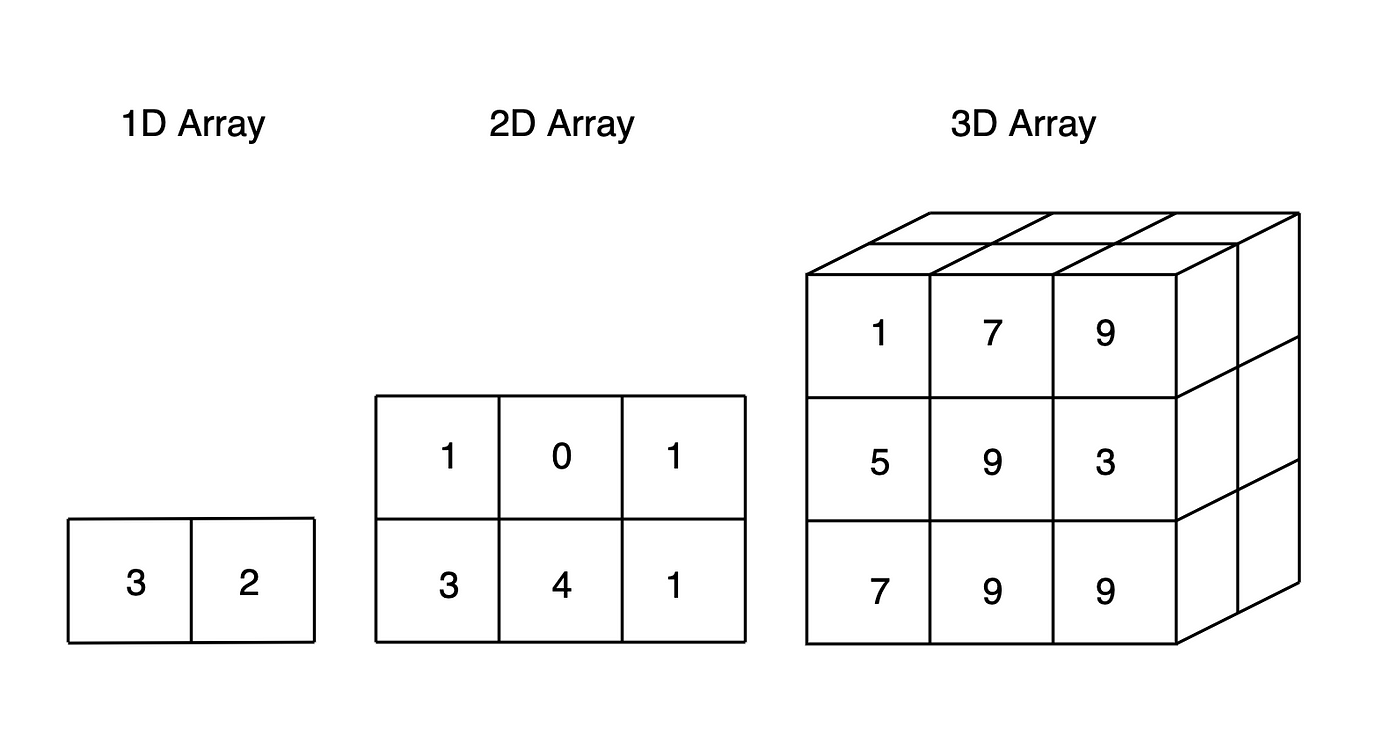

Comparing NDArray vs. lists
- Arrays hold many values of the *same type* (e.g. `int`, `float`), while lists can contain anything
- Arrays can have N dimensions (e.g. x,y,z coordinates), while lists and tuples have only 1.
- Numpy optimizes numerical operations on arrays. Numpy is _fast!_


In [ ]:
# create an array from a list or tuple
a = np.array([9,0,2,1,0])

print(type(a))
print(a)

In [ ]:
# find the datatype of each element
a.dtype

In [ ]:
# find the shape
a.shape

In [ ]:
# Create a 2-D array of floats
b = np.array([[1., 2., 3.],
              [4, 5, 6]])
print(b)

### Commonly used array attributes
* `dtype`: the datatype of each element in the array
* `ndim`: number of dimensions in the array (i.e. 1-D, 2-D, 3-D, etc)
* `shape`: number of elements in each dimension
* `size`: total number of elements in the array

In [ ]:
print('dtype:',b.dtype)
print('ndim: ',b.ndim)
print('shape:',b.shape)
print('size: ',b.size)

The shape `(2,3)` means the array has 2 rows and 3 columns (2-D array).

In [ ]:
# Array arithmetic is intuitive
2 * a + 1

In [ ]:
# Square every element of an array
a**2

In [ ]:
x = np.array([[1,0],
              [0,2]])
y = np.array([[2,0],
              [1,1]])
# Elementwise multiplication
x * y

In [ ]:
# Matrix multiplication
x @ y
# Equivalent: np.matmul(x,y)

In [ ]:
# Apply functions to each element of an array
np.exp(x)
np.sin(y)

## Array Creation Functions

There are many ways to create arrays.

In [ ]:
# Uniform arrays
c = np.zeros( (4,3) )       # (4,3) = 4 rows, 3 colummns
d = np.ones( (3,4,2) )      # (3,4,2) = 3 rows, 4 columns, 2 levels/sheets/pages
e = np.full( (3,3), np.pi)  # All elements are π

In [ ]:
# Uniform arrays with the same shape as existing arrays
f = np.ones_like(e)  # same shape as e, but all ones
g = np.zeros_like(e) # same shape as e, but all zeros

`arange` creates evenly spaced numbers within an interval. `arange` is similar to `range`, but it populates the array "eagerly" (i.e. immediately), rather than generating the values upon iteration.

In [ ]:
np.arange(10)

`arange` is left inclusive, right exclusive, just like `range`, but also works with floating-point numbers.

In [ ]:
np.arange( 10, 12, 0.5 )

`linspace` generates N evenly spaced numbers within an interval.

In [ ]:
# 20 numbers evenly spaced from 2 to 4
np.linspace( 2, 4, 20 )

In [ ]:
# Evenly spaced on a logarithmic scale
# Each element is a constant multiple of the prior element
np.geomspace( 10, 100, 10 )

In [ ]:
# Same as geomspace, but the start and stop values are given as base-10 logarithms
np.logspace( 1, 2, 10 ) # 1 means 10**1 = 1; 2 means 10**2 = 100

`meshgrid` creates 2D arrays out of a combination of 1D arrays. This is useful for tracking the x and y coordinates of every point in a 2-D grid.

In [ ]:
x = np.arange(5)
y = np.arange(3)
xx, yy = np.meshgrid(x,y)

# Columns of xx all have the same value
print('xx:')
print(xx)

# Rows of yy all have the same value
print('yy:')
print(yy)

### Exercises

1. Use `np.array` to create an array with the following values: `[ 1000, 950, 800, 700, 500, 300 ]`

3. Use `np.arange` to create an array with the following values: `[ 2, 2.5, 3, 3.5, 4, 4.5, 5 ]`

4. Use `np.linspace` to create an array with the same values

5. Create an array with 25 elements covering the range 5 to 10. Will you use `np.arange` or `np.linspace`?

In [ ]:
# Write your code here

## Indexing

Basic indexing is similar to lists

In [ ]:
print(b)

In [ ]:
# Individual elements of an array
print(b[0,0], 
      b[0,2], 
      b[-1,-1] )

# 3-D arrays have 3 indices
#array3d[i,j,k]

In [ ]:
# column of an array
b[:,0]

In [ ]:
# row of an array
b[0,:]

In [ ]:
# block subset of an array
b[0:2,0:2]

There are many advanced ways to index arrays. You can [read about them](https://numpy.org/doc/stable/reference/arrays.indexing.html) in the manual. Here is one example.

In [ ]:
# Use a boolean array as an index
# idx is True for elements >4
idx = b>4
# Subset elements of b where idx is True (b>4)
b[ idx ]

In [ ]:
# flatten the array to 1-D
b.ravel()

## Manipulating array dimensions ##

Swapping the dimension order is accomplished by calling `transpose()`.

In [ ]:
print('original:')
print(b)
print('\ntranspose:')
print(b.transpose())

# b.T is the same as b.transpose()

`reshape()` changes the shape of an array...as long as the new shape has the same number of elements.

In [ ]:
# Two possible ways to reshape b
print(b.reshape( (3,2) ))
print()
print(b.reshape( (6,1) ))


In [ ]:
# An error occurs if the new shape has a different number of elements
b.reshape( (3,3) )

`tile()` repeats an array many times

In [ ]:
b_tiled = np.tile( b, (2,2) )
print(b_tiled)

Convert 1-D arrays to 2-D, with a singleton (length 1) dimension by indexing with `np.newaxis`.

In [ ]:
a = np.arange(4)
print(a)
print(a.shape)

In [ ]:
# Place elements of a in 1st column of a 2-D array
a_column = a[:,np.newaxis]
print(a_column)
print(a_column.shape)

In [ ]:
# Place elements of a in 1st row of a 2-D array
a_row = a[np.newaxis,:]
print(a_row)
print(a_row.shape)

In [ ]:
# Reshape can do the same thing, with more typing
print( a.reshape( (a.size, 1) ) )

In [ ]:
# We can add multiple singleton dimensions, if needed
a[np.newaxis, :, np.newaxis, np.newaxis].shape

### Exercise

Create a 2-D array with one row ``[[1 1 1 1]]``

If the array is `z`, what is ``z.transpose()``?

In [ ]:
# Write your code here

## Broadcasting


Not all the arrays we want to work with will have the same size.
One approach would be to manually "expand" our arrays to all be the same size, e.g. using `tile`.
_Broadcasting_ is a more efficient way to multiply arrays of different sizes
Numpy has specific rules for how broadcasting works.
These can be confusing but are worth learning if you plan to work with Numpy data a lot.

The core concept of broadcasting is telling Numpy which dimensions are supposed to line up with each other.

Example 1: Array + Scalar

<img src="https://numpy.org/doc/stable/_images/broadcasting_1.png" style="background-color:white;">

Example 2: Array + Array

<img src="https://numpy.org/doc/stable/_images/broadcasting_2.png" style="background-color:white;">

<img src="https://numpy.org/doc/stable/_images/broadcasting_4.png" style="background-color:white;">

Broken example:

<img src="https://numpy.org/doc/stable/_images/broadcasting_3.png" style="background-color:white;">

[Numpy broadcasting documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html)

Dimensions are automatically aligned _starting with the rightmost (last) dimension_.
If dimensions have the same length or one of them is length 1, then the two arrays can be broadcast.

In [ ]:
# Create arrays similar to the example
a = np.array( [0, 10, 20, 30] )
b = np.arange( 1,4 )
print(a.shape, b.shape)

# This broadcast attempt won't work because the rightmost dimensions don't align
c = a + b

We can add a dimension to enable broadcasting

In [ ]:
# We can add a dimension to enable broadcasting
a_column = a[:,np.newaxis]
print(a_column.shape, b.shape)
print(a_column + b)

### Exercise

Make an array containing a multiplication table using broadcasting.

1. Create an array named `x` containing the whole numbers 1-5
2. Make `x` have shape (1,5) (i.e. 5 columns)
3. Create an array named `y` containing the whole numbers 1-4
4. Make `y` have shape (4,1) (i.e. 4 rows)
5. Compute `z = x * y` and print it.

The result should be
```
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]]
```

<details>
    <summary>Hint</summary>
    Use `np.arange` to create the arrays. Use `[np.newaxis,:]` or `reshape()` to reshape x and y.
</details>

<details>
    <summary>Solution</summary>

    x = np.arange(1,6)[np.newaxis,:]
    y = np.arange(1,4)[:,np.newaxis]
    x.shape,y.shape
    z = x * y
    print(z)
</details>

In [ ]:
# Write your code here

## Visualizing Arrays with Matplotlib

It can be hard to work with big arrays without actually seeing anything with our eyes!
We will now bring in Matplotib to start visualizating these arrays.
For now we will just skim the surface of Matplotlib.
Much more depth will be provided soon.

In [ ]:
import matplotlib.pyplot as plt

For plotting a 1D array as a line, we use the `plot` command.

In [ ]:
# Create some data to plot
x = np.linspace( 0, 2*np.pi, 100 )
y = np.sin(x)

# Plot the arrays
plt.plot(x,y)

`pcolormesh` displays 2-D data, although there are many other display functions too.

In [ ]:
# Generate some data for x (longitude), y (latitude)
x = np.linspace(-180, 180, 200)
y = np.linspace(-90,  90,  100)
xx, yy = np.meshgrid(x, y)
ff = ( np.sin(xx*np.pi/180) * np.cos(0.5*yy*np.pi/180) )**2

# Display 2-D data
plt.pcolormesh(xx,yy,ff)
plt.colorbar()

## Reduction Operations

In scientific data analysis, we usually start with a lot of data and want to reduce it down in order to make plots of summary tables.
Operations that reduce the size of numpy arrays are called "reductions".
There are many different reduction operations. Here we will look at some of the most common ones.

In [ ]:
# sum
ff.sum()

In [ ]:
# mean
ff.mean()

In [ ]:
# standard deviation
ff.std()

In [ ]:
# minimum
ff.min()

In [ ]:
# maximum
ff.max()

A key property of numpy reductions is the ability to operate on just one axis.

In [ ]:
# apply on just one axis
ff_ymean = ff.mean(axis=0)
ff_xmean = ff.mean(axis=1)

In [ ]:
plt.plot(x, ff_ymean)

In [ ]:
plt.plot(ff_xmean, y)

## Data Files

It can be useful to save numpy data into files.

In [ ]:
np.save('g.npy', g)

```{warning}
Numpy `.npy` files are a convenient way to store temporary data, but they are not considered a robust archival format.
Later we will learn about NetCDF, the recommended way to store earth and environmental data.
```

In [ ]:
g_loaded = np.load('g.npy')

np.testing.assert_equal(g, g_loaded)

## NumPy speed

Compare speed of multiplying and summing NumPy arrays vs. Python lists.

In [ ]:
# Test data
n = 10000
x = np.random.rand(n)
y = np.random.rand(n)
xlist = list(x)
ylist = list(y)

In [ ]:
%%timeit # Jupyter "magic command" measures runtime
# Native Python
z = 0
for i in range(n):
    z += x[i] * y[i]

In [ ]:
%%timeit
# Same calculation in NumPy
z = np.sum( x * y )

***What makes NumPy so much faster?***
* Parallel processing
* NumPy uses optimized C and C++ math libraries.

## Review Questions

### Read code
Assume that a variable has been defined as follows
```
a = np.ones( (3,5,2) )
```

What output will the following produce or will an error occur?

---
```
a.ndim
```
---
```
a.size
```
---
```
a.shape
```
---
```
a.dtype
```
---
```
type(a)
```
---
```
a.shape( (15,2) )
```
---
```
a.reshape( (15,2) )

### Read code
Assume that a variable has been defined as follows
```
b = np.array( [[11, 12, 13, 14],
               [21, 22, 23, 24],
               [31, 32, 33, 34]] )
```

What output will the following produce or will an error occur?

---
```
b[1,2]
```
---
```
b[3,0]
```
---
```
b[2,-2]
```
---
```
b[1,:]
```
---
```
b[:,0]
```

### Code snippet

Write a numpy command to generate each of the following arrays.

---
```
[ 3, 3.2, 3.4, 3.6, 3.8, 4 ]
```

---
```
[ -10, -15, -20, -25 ]
```

---
```
[ 1, 10, 100, 1000, 10000 ]
```

---
```
[[ 0, 0, 0 ]
 [ 0, 0, 0 ]]
```
---
```
[[ 1, 1]
 [ 1, 1]
 [ 1, 1]]
```